# Előkészületek

## Szükséges könyvtárak importálása


In [6]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt

## Adatok beolvasása



In [7]:
# Oszlopok definiálása
cols = ['Y', 'X_1', 'X_2']

# Adatok beolvasása string-ként
with open('data/bead2.csv', 'r') as file:
    lines = file.readlines()

# Az első sor elhagyása (mivel az az oszlopokat tartalmazza)
# Az értékek átalakítása soronként listává
data = [list(map(float, line.strip().strip('"').split(','))) for line in lines[1:]]

# DataFrame létrehozása
df = pd.DataFrame(data, columns=cols)

# Adatok szétválasztása
X = df[['X_1', 'X_2']]  # magyarázó változók
y = df['Y']             # eredményváltozó

# Alapvető statisztikák
print("\nAlapvető statisztikák:")
print(df.describe())


Alapvető statisztikák:
               Y        X_1        X_2
count  50.000000  50.000000  50.000000
mean    6.130800   4.994800   5.082600
std     4.188834   2.909244   2.786417
min     0.000000   0.520000   0.340000
25%     1.335000   2.557500   2.612500
50%     7.915000   4.945000   5.130000
75%    10.000000   7.552500   7.927500
max    10.000000   9.900000   9.400000


# Becslések

## Az együtthatók pontbecslése
### Regressziós együtthatók pontbecslése

In [8]:
# Modell illesztése
model = LinearRegression()
model.fit(X, y)

# Együtthatók és tengelymetszet
print("\nRegressziós együtthatók:")
print(f"b₀ (tengelymetszet) = {model.intercept_:.4f}")
print(f"b₁ (küzdőképesség) = {model.coef_[0]:.4f}")
print(f"b₂ (gumimaci pontszám) = {model.coef_[1]:.4f}")


Regressziós együtthatók:
b₀ (tengelymetszet) = 4.1082
b₁ (küzdőképesség) = 1.0282
b₂ (gumimaci pontszám) = -0.6124


### Standardizált regressziós együtthatók pontbecslése

In [9]:
# Standardizálás
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1)).ravel()

# Standardizált modell illesztése
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

# Standardizált együtthatók
print("\nStandardizált regressziós együtthatók:")
print(f"b₁* (küzdőképesség) = {model_scaled.coef_[0]:.4f}")
print(f"b₂* (gumimaci pontszám) = {model_scaled.coef_[1]:.4f}")


Standardizált regressziós együtthatók:
b₁* (küzdőképesség) = 0.7141
b₂* (gumimaci pontszám) = -0.4074


### Lineáris modell:
OLS Lineáris regresszió

### Eredmények értelmezése
Az együtthatók közvetlenül összehasonlíthatók, mert azonos skálán vannak.  
Látható, hogy az X₁ változó hatása erősebb az Y-ra, mint X₂-é.

## Előrejelzés készítése

In [10]:
# Új megfigyelés
X_new = pd.DataFrame({
    'X_1': [85],
    'X_2': [8.5]
})

# Előrejelzés
prediction = model.predict(X_new)

print("\nElőrejelzés eredménye:")
print(f"Input értékek:")
print(f"- Küzdőképesség (X₁) = {X_new['X_1'].values[0]}")
print(f"- Gumimaci pontszám (X₂) = {X_new['X_2'].values[0]}")
print(f"\nBecsült erő (Y) = {prediction[0]:.4f}")


Előrejelzés eredménye:
Input értékek:
- Küzdőképesség (X₁) = 85
- Gumimaci pontszám (X₂) = 8.5

Becsült erő (Y) = 86.2962


## Konfidenciaintervallum az együtthatókra
### Kód és eredmény

In [11]:
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

# 95%-os konfidencia intervallumok az együtthatókra
conf_int = model_sm.conf_int(alpha=0.05)
print("Egy R-szerű summary:")
print(model_sm.summary())
print("\n")
print(conf_int)
print("\nEgyütthatók 95%-os konfidencia intervallumai:")
print("-" * 50)
print("b₀ (tengelymetszet):")
print(f"[{conf_int.iloc[0,0]:.4f}, {conf_int.iloc[0,1]:.4f}]")
print("\nb₁ (küzdőképesség):")
print(f"[{conf_int.iloc[1,0]:.4f}, {conf_int.iloc[1,1]:.4f}]")
print("\nb₂ (gumimaci pontszám):")
print(f"[{conf_int.iloc[2,0]:.4f}, {conf_int.iloc[2,1]:.4f}]")

Egy R-szerű summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     56.88
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           2.81e-13
Time:                        21:31:19   Log-Likelihood:                -111.32
No. Observations:                  50   AIC:                             228.6
Df Residuals:                      47   BIC:                             234.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1082      0.91

### Eredmények értelmezése
##### A konfidencia intervallumok jelentése:  
95%-os valószínűséggel a valódi együttható értéke a megadott intervallumon belül van.
Az intervallum szélessége a becslés pontosságát jelzi (minél szélesebb, annál bizonytalanabb a becslés).  
Ha az intervallum nem tartalmazza a 0-t, akkor az adott változó hatása szignifikáns (α = 0.05 mellett). 
 
##### Következtetések:  
A változók szignifikánsak.  


## Előrejelzési intervallum

In [12]:
# Konstans hozzáadása, csupa 1-es
X_new_sm = sm.add_constant(X_new, has_constant='add')

# Előrejelzési intervallum számítása
prediction = model_sm.get_prediction(X_new_sm)
pred_summary = prediction.summary_frame(alpha=0.05)

print("\nElőrejelzés és intervallumok:")
print("-" * 50)
print(f"Pontbecslés: {pred_summary['mean'].values[0]:.4f}")
print(f"95%-os előrejelzési intervallum:")
print(f"[{pred_summary['obs_ci_lower'].values[0]:.4f}, {pred_summary['obs_ci_upper'].values[0]:.4f}]")


Előrejelzés és intervallumok:
--------------------------------------------------
Pontbecslés: 86.2962
95%-os előrejelzési intervallum:
[67.3380, 105.2545]


# Illeszkedésdiagnosztika
## Determinációs együttható (R²) és korrigált R²
### Kód és eredmények

In [13]:
r2 = model_sm.rsquared
adj_r2 = model_sm.rsquared_adj

print("\nDeterminációs együtthatók:")
print("-" * 50)
print(f"R² = {r2:.4f}")
print(f"Korrigált R² = {adj_r2:.4f}")
print(f"Különbség = {(r2-adj_r2):.4f}")


Determinációs együtthatók:
--------------------------------------------------
R² = 0.7077
Korrigált R² = 0.6952
Különbség = 0.0124


### Értelmezés

#### R² (Determinációs együttható):
A determinációs együttható értéke 0.7077, ami a modell által magyarázott variancia arányát mutatja.  
Az R² a teljes varianciához viszonyítva fejezi ki a modell által megmagyarázott hányadot.  
Értéke 0 és 1 közé esik, ahol 0 esetén a modell semmit nem magyaráz, 1 esetén tökéletes az illeszkedés.  
Az R² = 1 - (SSE/SST) képlettel számolható, ahol SSE a hiba szórásnégyzetösszeg, SST a teljes szórásnégyzetösszeg.  

#### Korrigált R²:
A korrigált R² értéke 0.6952, ami figyelembe veszi a magyarázó változók számát is.  
A korrigált R² = 1 - (1-R²)*(n-1)/(n-k-1) képlettel számolható, ahol n a mintaelemszám, k a magyarázó változók száma.  
Ez a mutató bünteti a felesleges magyarázó változók bevonását.  
Értéke mindig kisebb vagy egyenlő, mint az R².  

#### A két mutató jelentősége:
Az R² érték sosem csökken új változó bevonásakor, akkor sem, ha az valójában nem javít a modellen.  
A korrigált R² ezzel szemben csökkenhet, ha nem hasznos változót vonunk be a modellbe.  
Modellek összehasonlítására ezért a korrigált R² alkalmasabb.  
Ha nagy a különbség a két érték között, az felesleges változók jelenlétére utalhat.  

#### Értékelés:
A kapott R² = 0.7077 azt jelenti, hogy modellünk a variancia 70.77%-át magyarázza meg. A korrigált R² = 0.6952 érték a modell tényleges magyarázó erejét mutatja.

# Modelldiagnosztika
## Modelldiagnosztikai tesztek
### Kód és eredmények

In [14]:
# F-próba statisztikái
f_stat = model_sm.fvalue
f_pvalue = model_sm.f_pvalue
df_reg = 2  # magyarázó változók száma
df_res = len(df)-3  # n-k-1, ahol k a magyarázó változók száma
f_crit = stats.f.ppf(0.95, df_reg, df_res)

print(f"F-statisztika: {f_stat:.4f}")
print(f"p-érték: {f_pvalue}")
print(f"Kritikus érték (F0.95({df_reg},{df_res})): {f_crit:.4f}")

F-statisztika: 56.8848
p-érték: 2.808718819001525e-13
Kritikus érték (F0.95(2,47)): 3.1951


### Értelmezés

#### Hipotézisek:  
H₀: A modell nem magyarázza az eredményváltozó varianciáját (X₁ = X₂ = 0)  
H₁: A modell szignifikánsan magyarázza az eredményváltozó varianciáját (X_i ≠ 0)  
Szignifikanciaszint: α = 0.05  

#### F-próba eredménye:  
F-statisztika értéke: 56.8848  
p-érték: 2.808718819001525e-13  
Kritikus érték (F0.95(2,47)): 3.1951  

#### Döntés:  
Az F-próba p-értéke (2.808718819001525e-13) kisebb, mint α = 0.05.  
Elvetjük a nullhipotézist.  

#### Következtetés:  
A kapott eredmények alapján a modellünk szignifikáns.  
Ez azt jelenti, hogy a küzdőképesség és gumimaci pontszám együttesen magyarázzák szignifikánsan a mesehős erejét.  
A modell alkalmas előrejelzésre és további elemzésre.  
Az eredmény összhangban van a korábban számolt R² értékkel.

#### A teszt jelentősége:  
Az F-próba a modell egészének magyarázó erejét vizsgálja.  
Azt teszteli, hogy a magyarázó változók együttesen szignifikáns hatással vannak-e az eredményváltozóra.  
Az F-próba a determinációs együttható nullától való eltérését vizsgálja.  
A teszt a regressziós modell gyakorlati használhatóságáról ad információt.  

## Változók szignifikanciájának tesztelése
###  Kód és eredmények

In [15]:
# Kritikus érték meghatározása (kétoldali próba)
df_res = len(df) - 3  # szabadságfok: n-k-1
t_crit = stats.t.ppf(0.975, df_res)  # 0.975 a kétoldali próba miatt

print("\nKritikus érték:")
print(f"t_krit = ±{t_crit:.4f} (szabadságfok = {df_res})")
print("\nEgyütthatók tesztjei:")
print(model_sm.summary().tables[1])


Kritikus érték:
t_krit = ±2.0117 (szabadságfok = 47)

Együtthatók tesztjei:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1082      0.912      4.506      0.000       2.274       5.942
X_1            1.0282      0.114      9.041      0.000       0.799       1.257
X_2           -0.6124      0.119     -5.158      0.000      -0.851      -0.374


### Értelmezés
#### Hipotézispárok:  

Tengelymetszet (b₀):  
H₀: b₀ = 0  
H₁: b₀ ≠ 0  

Küzdőképesség (b₁):  
H₀: b₁ = 0  
H₁: b₁ ≠ 0  

Gumimaci pontszám (b₂):  
H₀: b₂ = 0  
H₁: b₂ ≠ 0  

#### Eredmények:  

Tengelymetszet (b₀):  
|t-érték| = 4.506 > 2.0117 (t_krit)  
Döntés: 5%-os szignifikanciaszinten elvetjük H₀-t  

Küzdőképesség (b₁):  
|t-érték| = 9.041 > 2.0117 (t_krit)  
Döntés: 5%-os szignifikanciaszinten elvetjük H₀-t  

Gumimaci pontszám (b₂):  
|t-érték| = 5.158 > 2.0117 (t_krit)  
Döntés: 5%-os szignifikanciaszinten elvetjük H₀-t  

#### Következtetések:  
A t-próba kritikus értéke ±2.0117 (47 szabadságfok mellett, 5%-os szignifikanciaszinten).  
A tengelymetszet |t| = 4.506 értéke meghaladja a kritikus értéket, ami azt jelenti, hogy amikor mindkét magyarázó változó 0, akkor a várható Y érték (4.1082) szignifikánsan különbözik nullától.     
A küzdőképesség |t| = 9.041 értéke jelentősen meghaladja a kritikus értéket, tehát erős szignifikáns hatást mutat.  
A gumimaci pontszám |t| = 5.158 értéke szintén meghaladja a kritikus értéket, így ez a hatás is szignifikáns.  
Mindhárom változó esetében elvetjük a nullhipotézist, ami azt jelenti, hogy mindegyik hatása szignifikáns.  

## Multikollinearitás vizsgálata
### Kód és eredmények

In [16]:
vif_data = pd.DataFrame()
vif_data["Változó"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF értékek:")
print(vif_data)


VIF értékek:
  Változó       VIF
0     X_1  2.273206
1     X_2  2.273206


### Értelmezés 

#### Döntési szabály:  
VIF > 5: erős multikollinearitás  
VIF > 10: súlyos multikollinearitás  
VIF ≈ 1: nincs multikollinearitás  

#### VIF érték:
A VIF érték: 2.273206  
A VIF érték azt mutatja, hogy egy változó mennyire magyarázható a többi magyarázó változóval.  
VIF = 1/(1-R²), ahol R² az adott változónak a többi magyarázó változóval vett determinációs együtthatója.    
A kapott VIF értékek alapján nincs jelentős multikollinearitás a modellben.  

#### Miért probléma a multikollinearitás?  
A multikollinearitás növeli az együtthatók standard hibáját. Bizonytalanabbá teszi a paraméterek becslését. Nehézzé teszi az egyes változók egyedi hatásának elkülönítését. Instabillá teheti a modellt: kis változás az adatokban nagy változást okozhat az együtthatókban. 

## Hibatagok vizsgálata
### Kód és eredmények


Hibatagok vizsgálata:
--------------------------------------------------

Várható érték vizsgálata:
Átlag (várható érték becslése): -4.263256414560601e-16
t-statisztika: -1.3035784262394252e-15
p-érték: 0.9999999999999989

Normalitás vizsgálata (Shapiro-Wilk):
Teszt statisztika: 0.9779
p-érték: 0.4678

Függetlenség vizsgálata (Durbin-Watson):
DW statisztika: 1.5689

Homoszkedaszticitás vizsgálata (Breusch-Pagan):
Teszt statisztika: 1.3786
p-érték: 0.5019

Variancia becslése:
Becsült variancia: 5.3478


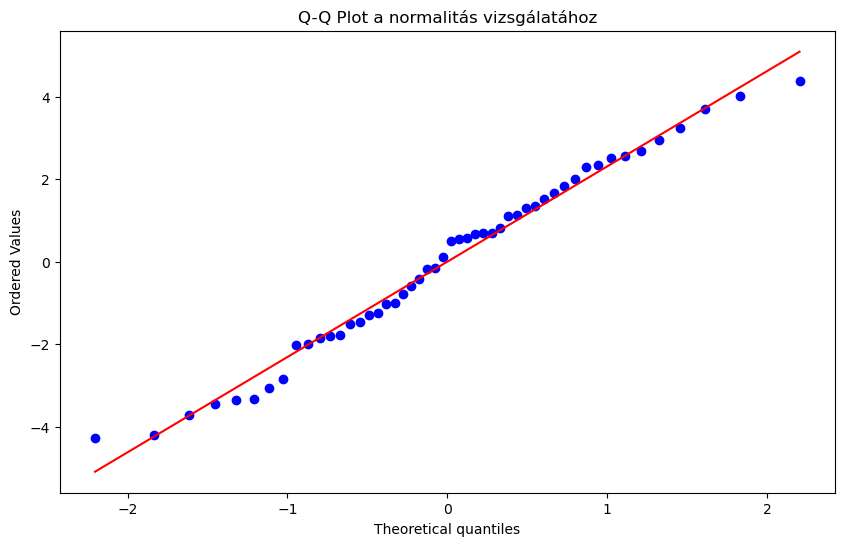

In [17]:
# Reziduálisok kiszámítása
residuals = model_sm.resid

# 1. Várható érték vizsgálata
resid_mean = np.mean(residuals)
resid_std = np.std(residuals, ddof=len(X_sm.columns))
t_stat = resid_mean / (resid_std/np.sqrt(len(residuals)))
p_value_mean = 2 * stats.t.cdf(-abs(t_stat), len(residuals)-1)

# 2. Normalitás vizsgálata (Shapiro-Wilk teszt)
shapiro_stat, shapiro_p = stats.shapiro(residuals)

# 3. Függetlenség vizsgálata (Durbin-Watson teszt)
dw_stat = sm.stats.stattools.durbin_watson(residuals)

# 4. Homoszkedaszticitás vizsgálata (Breusch-Pagan teszt)
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X_sm)

# 5. Variancia becslése
variance = np.var(residuals, ddof=len(X_sm.columns))

print("\nHibatagok vizsgálata:")
print("-" * 50)

print("\nVárható érték vizsgálata:")
print(f"Átlag (várható érték becslése): {resid_mean}")
print(f"t-statisztika: {t_stat}")
print(f"p-érték: {p_value_mean}")

print("\nNormalitás vizsgálata (Shapiro-Wilk):")
print(f"Teszt statisztika: {shapiro_stat:.4f}")
print(f"p-érték: {shapiro_p:.4f}")

print("\nFüggetlenség vizsgálata (Durbin-Watson):")
print(f"DW statisztika: {dw_stat:.4f}")

print("\nHomoszkedaszticitás vizsgálata (Breusch-Pagan):")
print(f"Teszt statisztika: {bp_test[0]:.4f}")
print(f"p-érték: {bp_test[1]:.4f}")

print("\nVariancia becslése:")
print(f"Becsült variancia: {variance:.4f}")

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot a normalitás vizsgálatához')
plt.show()

### Értelmezés

#### Várható érték vizsgálata:  
H₀: E(ε) = 0  
H₁: E(ε) ≠ 0  
t-statisztika értéke: -1.3036e-15  
p-érték: 1.0000  
Döntés: 1.0000 > 0.05, tehát nem vetjük el H₀-t  
A lineáris regresszióban, ha a modell tartalmaz konstans tagot (interceptet), akkor a reziduálisok összege nulla lesz, és így az átlaguk is nulla, ezért ez nem túlzottan meglepő.  

#### Normalitás vizsgálata (Shapiro-Wilk teszt):  
H₀: A hibatagok normális eloszlásúak  
H₁: A hibatagok nem normális eloszlásúak  
Teszt statisztika: 0.9779  
p-érték: 0.4678  
Döntés: 0.4678 > 0.05, tehát nem vetjük el H₀-t  

#### Függetlenség vizsgálata (Durbin-Watson teszt):  
H₀: A hibatagok függetlenek  
H₁: A hibatagok autokorreláltak  
DW statisztika: 1.5689  
Kritikus értékek 5%-os szinten: dL = 1.46, dU = 1.63  (DW táblázatból: https://www3.nd.edu/~wevans1/econ30331/durbin_watson_tables.pdf)  
Döntés: 1.5689 beleesik az [1.46, 1.63] intervallumba, így nem tudunk egyértelmű döntést hozni  

#### Homoszkedaszticitás vizsgálata (Breusch-Pagan teszt):  
H₀: A hibatagok homoszkedasztikusak  
H₁: A hibatagok heteroszkedasztikusak  
Teszt statisztika: 1.3786  
p-érték: 0.5019  
Döntés: 0.5019 > 0.05, tehát nem vetjük el H₀-t  

#### Variancia becslése:  
A hibatagok becsült varianciája: 5.3478  
A variancia a reziduálisok szóródását méri a regressziós egyenes körül.  

#### Összefoglaló értékelés:  
A várható érték feltétel teljesül.  
A normalitás feltétele teljesül.  
A függetlenség feltételéről nem tudunk egyértelmű döntést hozni.  
A homoszkedaszticitás feltétele teljesül (a szórás állandó).